### Load and transform input data

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000 # size of vocabulary (one-hot encoding)
embedding_vector_size = 128 # embed vocabulary into float vector
maxlen = 500 # max length of reviews (in terms of number of words)
batch_size = 64

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), ' training sequences of shape ', x_train.shape)
print(len(x_test), ' test sequences of shape ', x_test.shape)

25000  training sequences of shape  (25000,)
25000  test sequences of shape  (25000,)


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('Training sequences\' shape: ', x_train.shape)
print('Test sequences\' shape: ', x_test.shape)

Training sequences' shape:  (25000, 500)
Test sequences' shape:  (25000, 500)


### Set up neural network model and fit it to data

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_features, embedding_vector_size, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=10, 
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.4753 - acc: 0.7559 - val_loss: 0.3263 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2633 - acc: 0.8946 - val_loss: 0.2872 - val_acc: 0.8838
Epoch 3/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1902 - acc: 0.9259 - val_loss: 0.3658 - val_acc: 0.8534
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1347 - acc: 0.9519 - val_loss: 0.3697 - val_acc: 0.8672
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.0898 - acc: 0.9698 - val_loss: 0.3472 - val_acc: 0.8804
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.0533 - acc: 0.9837 - val_loss: 0.3843 - val_acc: 0.8774
Epoch 7/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.0240 - acc: 0.9940 - val_loss: 0.4557 - val_acc:

In [8]:
model.save('01fIMDB_Embed_Conv1D_MaxPool_Conv1D_GlobalMaxPool_Dense1.h5')

### Plot results of the fitting

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [11]:
epochs = range(1, len(acc) + 1)

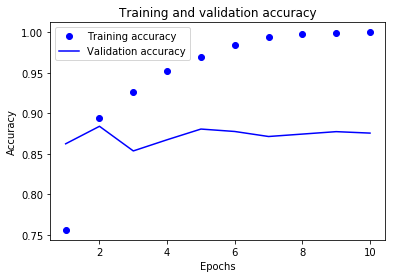

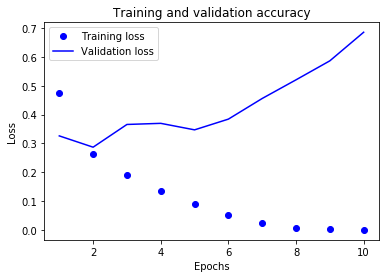

In [12]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()